In [7]:
library(ggplot2)
library(comprehenr)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Exercise 1

In [8]:
triangular <- function(x, a=-2, b=2, c=0){
        ifelse(x >=  a & x < c, (2*(x-a))/((b-a)*(c-a)), 
            ifelse((x >= c & x <= b), (2*(b-x))/((b-a)*(b-c)), 0))
}

In [9]:
a = -2
b = 2
c = 0
x_axis <- seq(-2, 2, length=101)
y_axis <- triangular(x_axis, a, b, c)

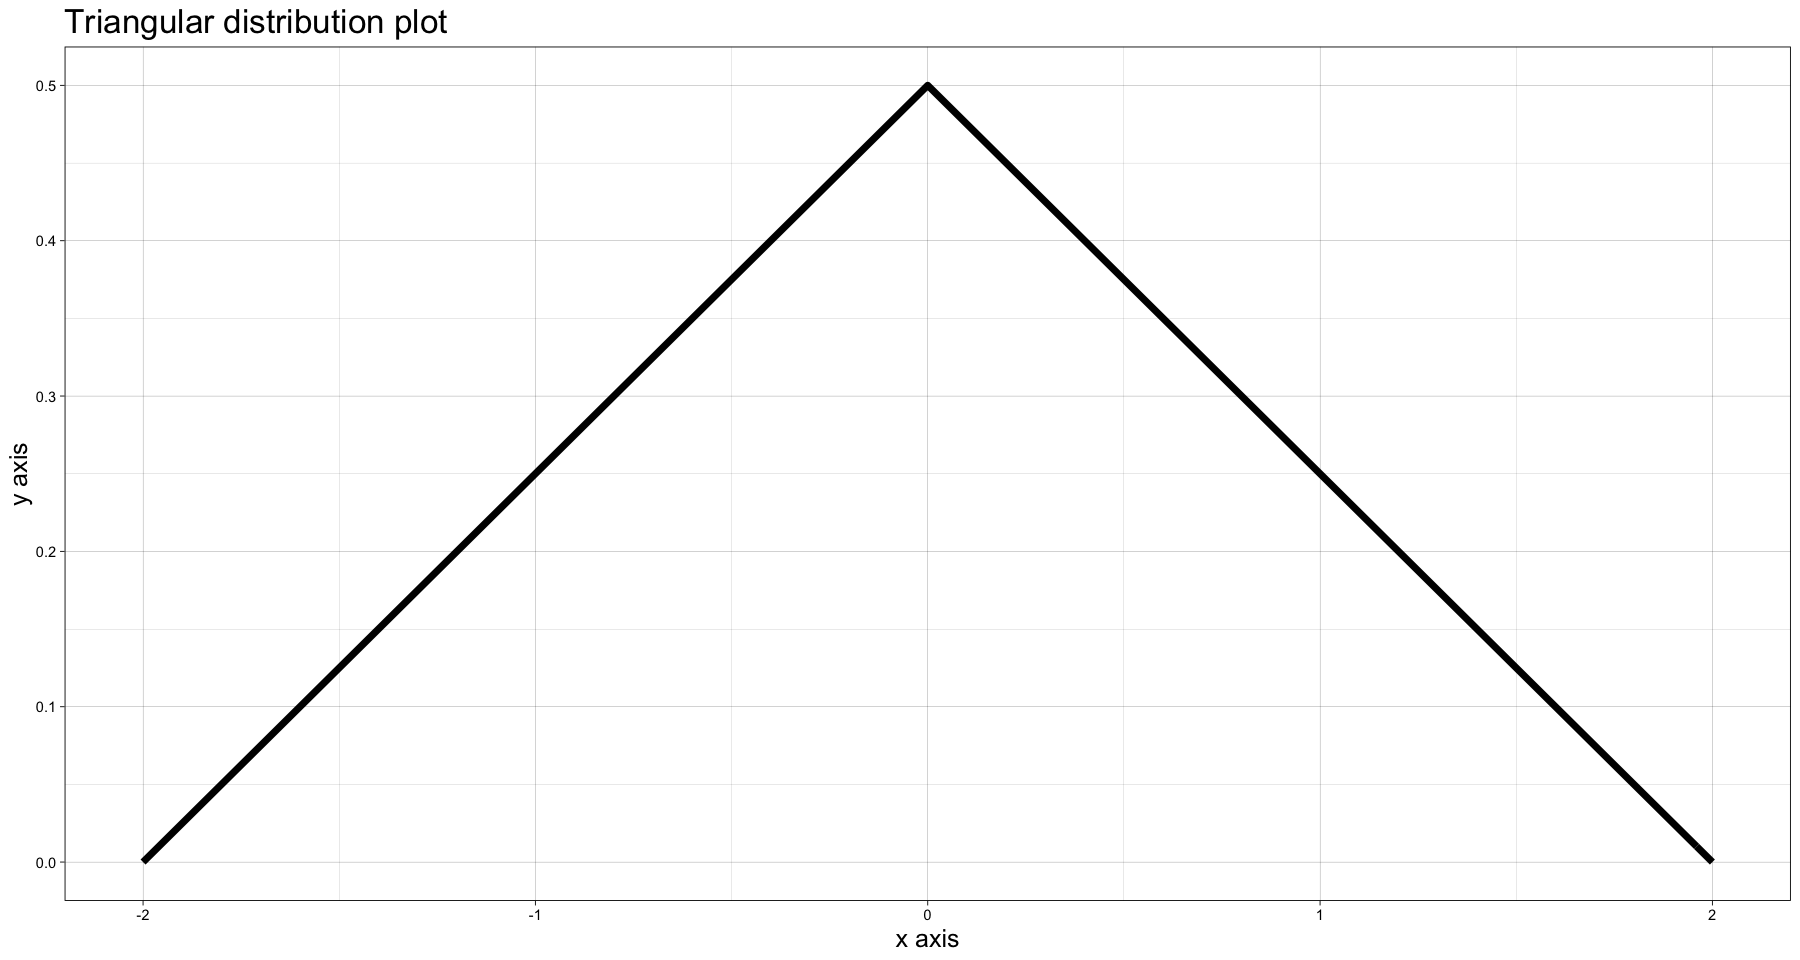

In [10]:
options(repr.plot.width=15, repr.plot.height=8)
triangular_plot <- ggplot() +
                   theme_linedraw() +
                   geom_line(aes(x=x_axis, y=y_axis), stat='identity', lwd=2)  +
                   ggtitle('Triangular distribution plot') +
                   ylab('y axis') +
                   xlab('x axis') +
                   theme(plot.title = element_text(size=20)) +
                   theme(axis.title = element_text(size=15))
                    
                   
triangular_plot

In [11]:
p_custom <- function(x, a, b, c){
            d <- 1/((b-a)*(c-a))
            e <- 1/((b-a)*(b-c))
            cumul <- ifelse(x >=  a & x < c, d*(x^2-2*a*x)+1/2,
                           ifelse(x >= c & x <= b, e*(2*b*x-x^2)+1/2,0))
    
}



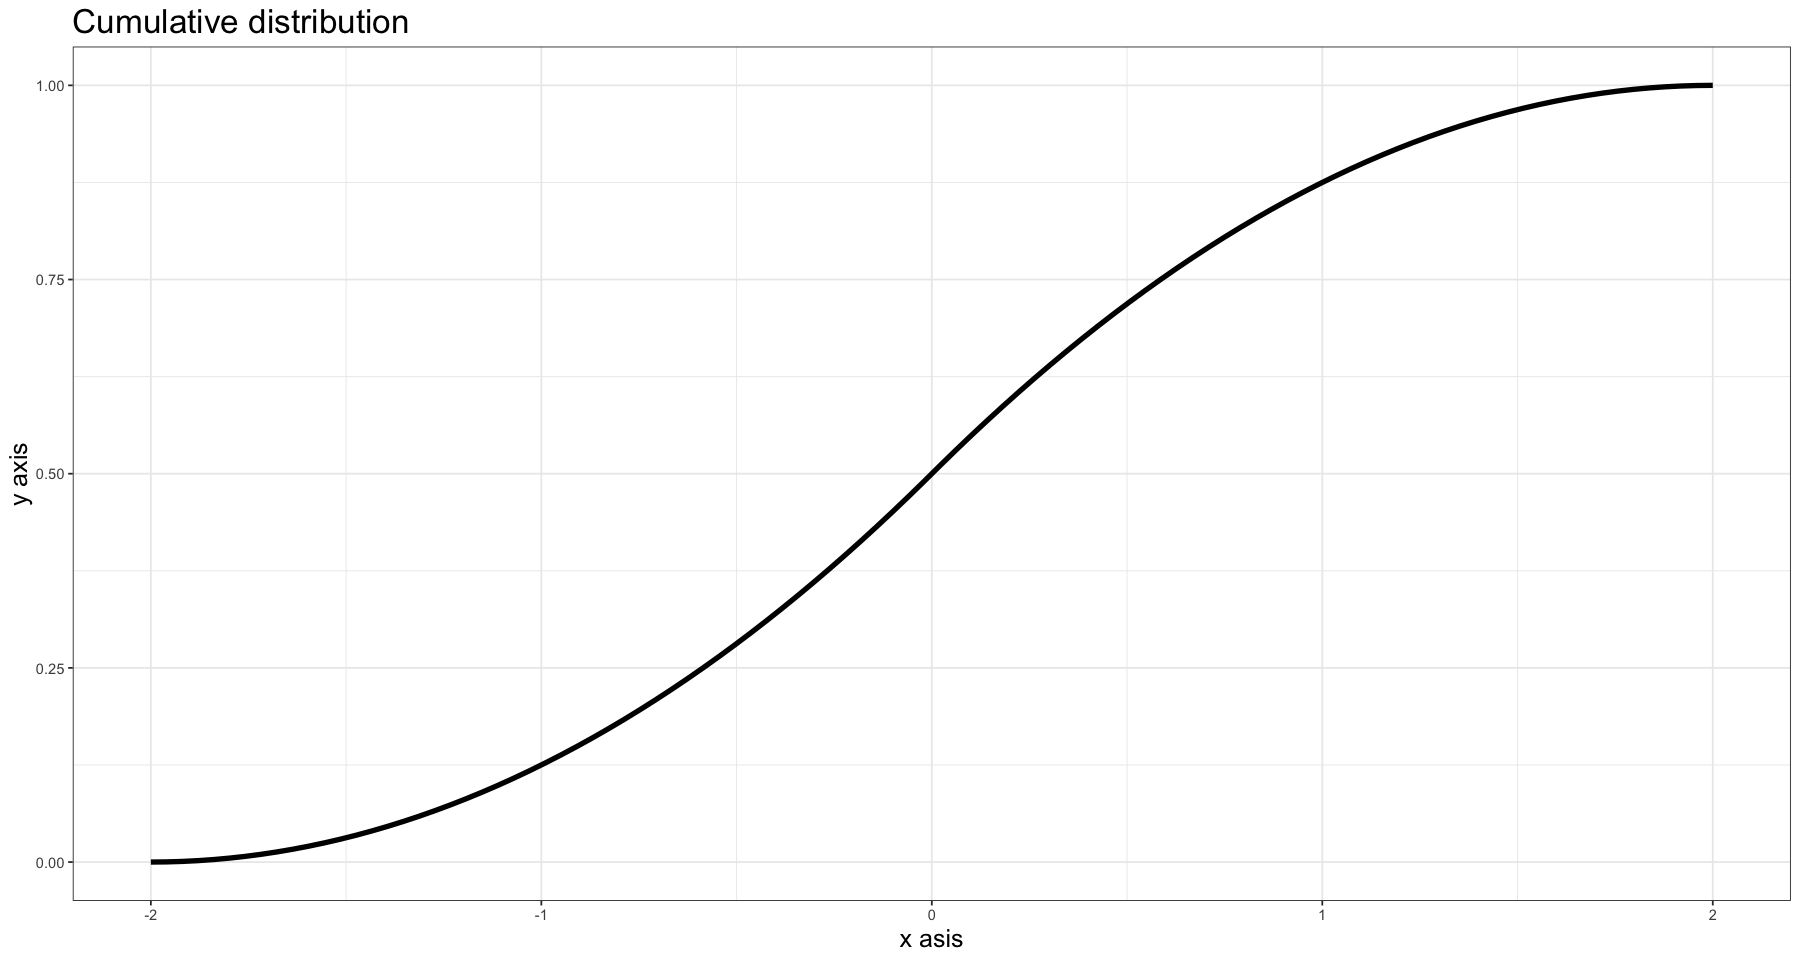

In [12]:
x_axis=seq(-2, 2, length=100)
cum_plot <- ggplot()+
            theme_bw() +
            xlab('x asis') +
            ylab('y axis') +    
            ggtitle('Cumulative distribution') +
            theme(axis.title = element_text(size=15)) +
            theme(plot.title = element_text(size=20)) +
            geom_line(aes(x=x_axis, y=p_custom(x_axis, -2, 2, 0)), lwd=1.5)

cum_plot

In [13]:
#After inverting the function...
r_custom <- function(n, a, b, c)
{
    d <- 1/((b-a)*(c-a))
    e <- 1/((b-a)*(b-c))
    us <- runif(n)
    ifelse(us < 0.5, sqrt((us-1/2)/d+a^2) + a , -sqrt((-us+1/2)/e+b^2) + b)
  
    
    
}

In [14]:
pdf <- r_custom(1:10^4, -2,2, 0)

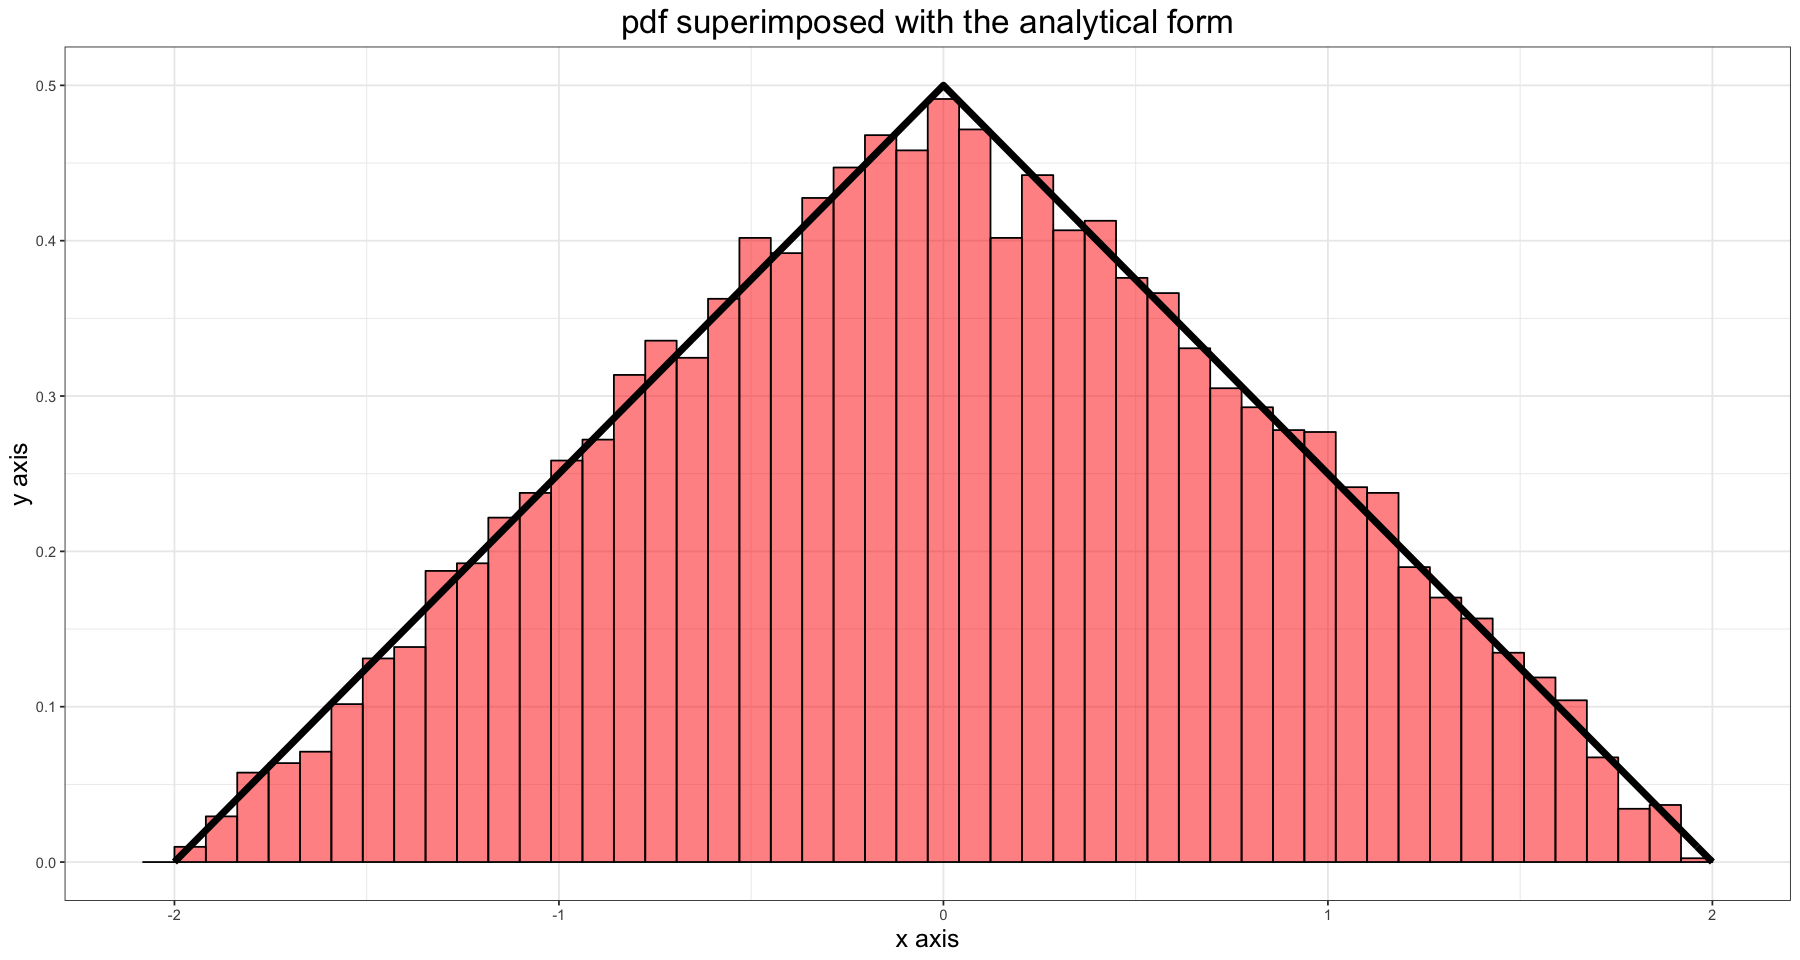

In [15]:
x_axis=seq(-2, 2, length=101)
pdf_plot <- ggplot() +
            geom_histogram(aes(x=pdf, y=..density..), fill='red', alpha=0.5, bins=50, color='black') +
            geom_line(aes(x=x_axis, y=y_axis), stat='identity', lwd=2) +
            theme_bw() +
            ggtitle('pdf superimposed with the analytical form') +
            ylab('y axis') +
            xlab('x axis') +
            theme(plot.title = element_text(size=20, hjust = 0.5)) +
            theme(axis.title = element_text(size=15))
pdf_plot

# Exercise 2

## Point 1 

In [24]:
#Function for Markov's bound plotting
markov_bound <- function(x_axis, y, exp_value, distr_name){
        plot <- ggplot() +
        geom_line(aes(x=x_axis, y = y, color='1-cumulative') , lwd=1.5)+
        geom_line(aes(x=x_axis, y=exp_value/(x_axis), color='Markov\'s upper bound'), lwd=1.5) +
        theme_bw() +
        labs(color='') +
        theme(legend.text=element_text(size=15)) +
        ggtitle(sprintf('Survivabiliy and Markov\'s upper bound %s distribution', distr_name)) +
        xlab('x axis') +
        ylab('y axis') +
        theme(plot.title = element_text(size=20)) +
        theme(axis.title = element_text(size=15)) +
        geom_hline(aes(yintercept=1, color='y = 1 line'), linetype='dashed', size=1) +
        ylim(0, 2.5)
            
    return(plot)
}

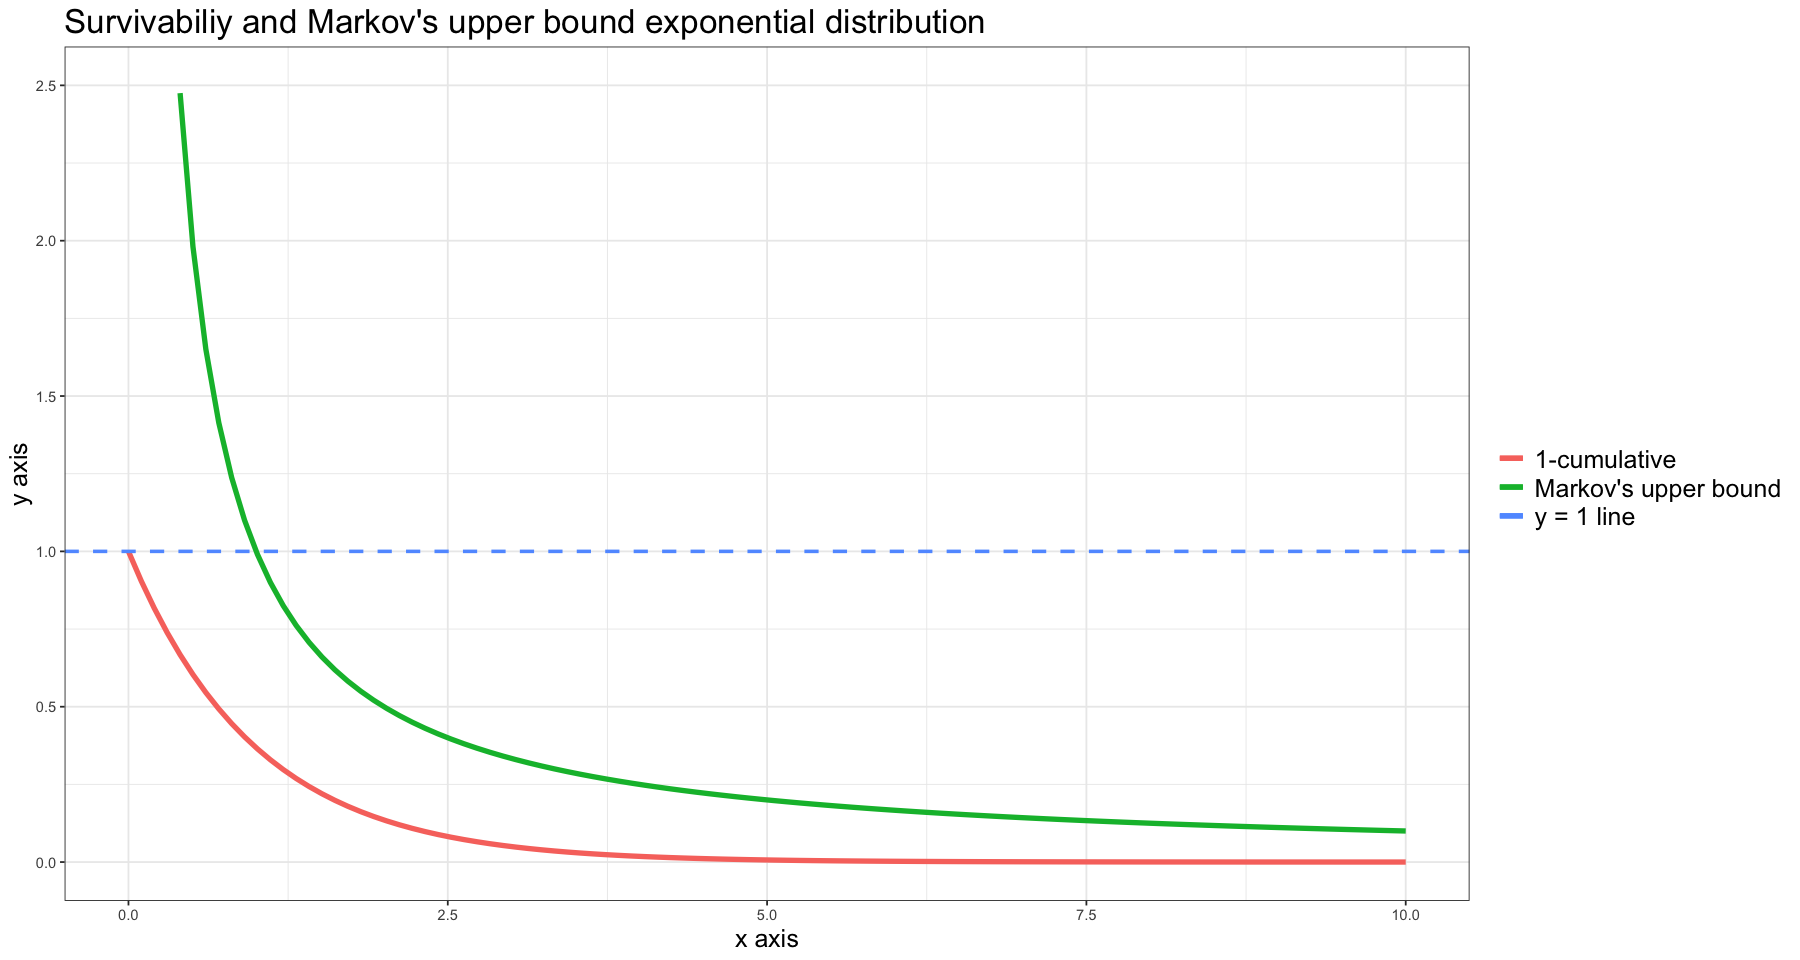

Warning message:
“Removed 15 rows containing missing values (geom_path).”

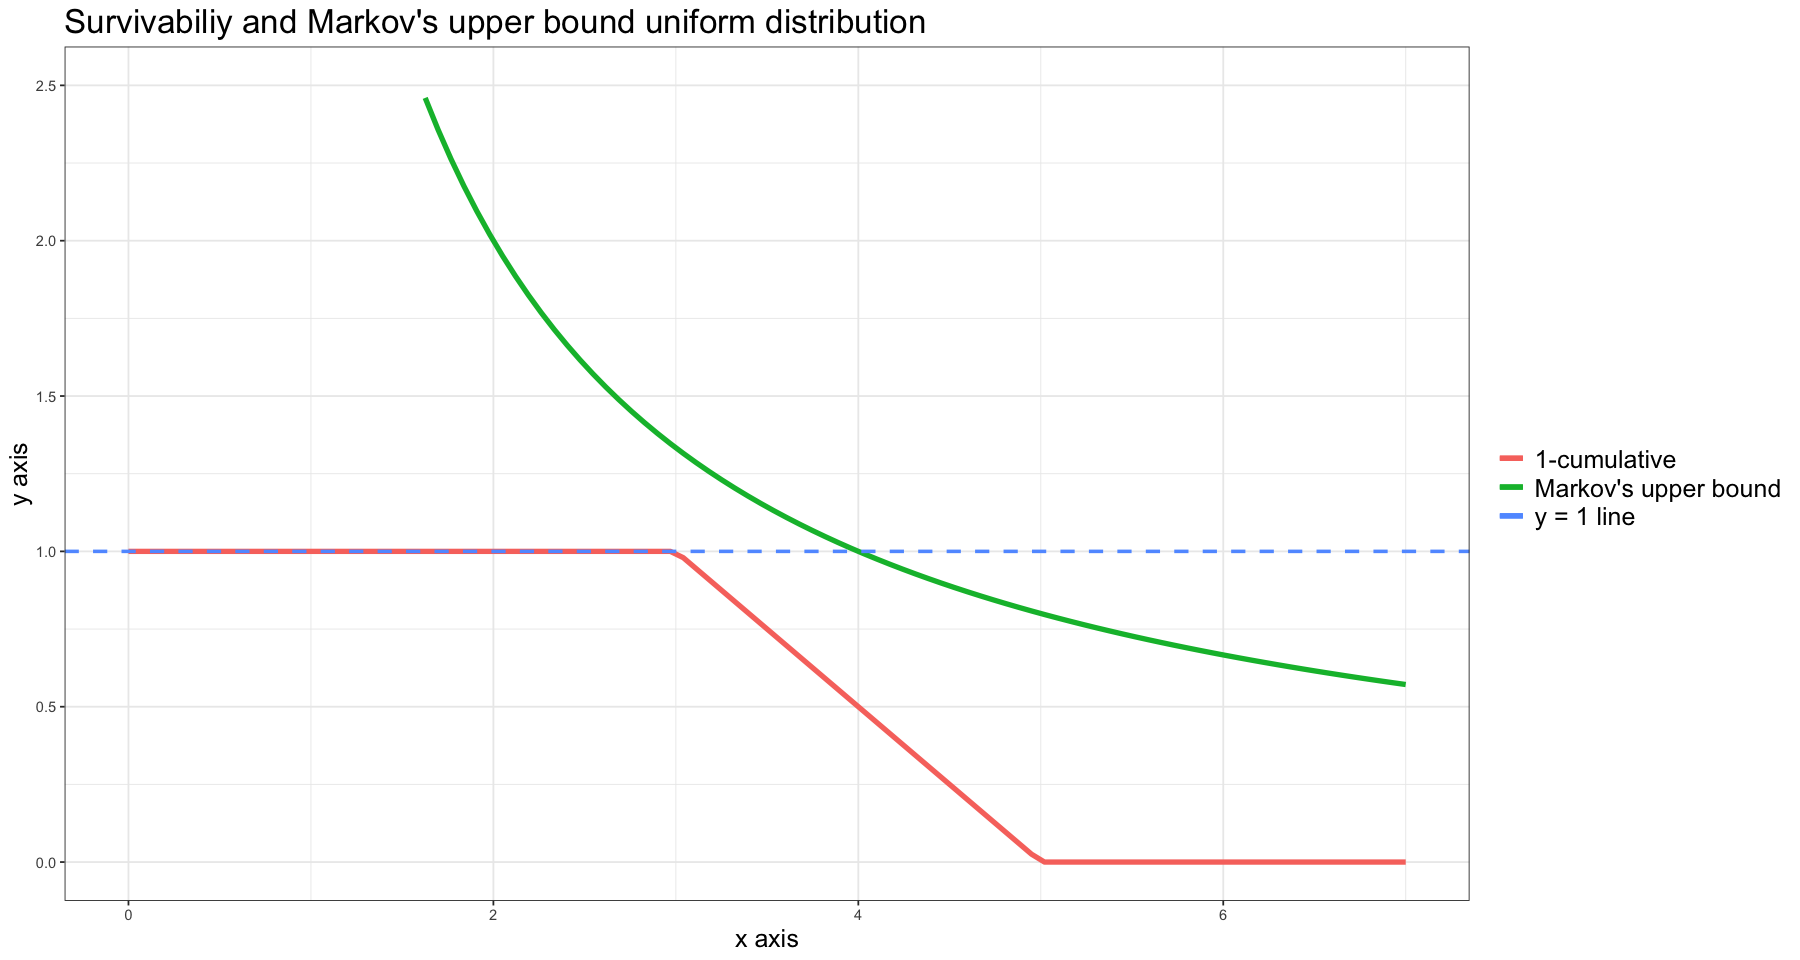

Warning message:
“Removed 18 rows containing missing values (geom_path).”

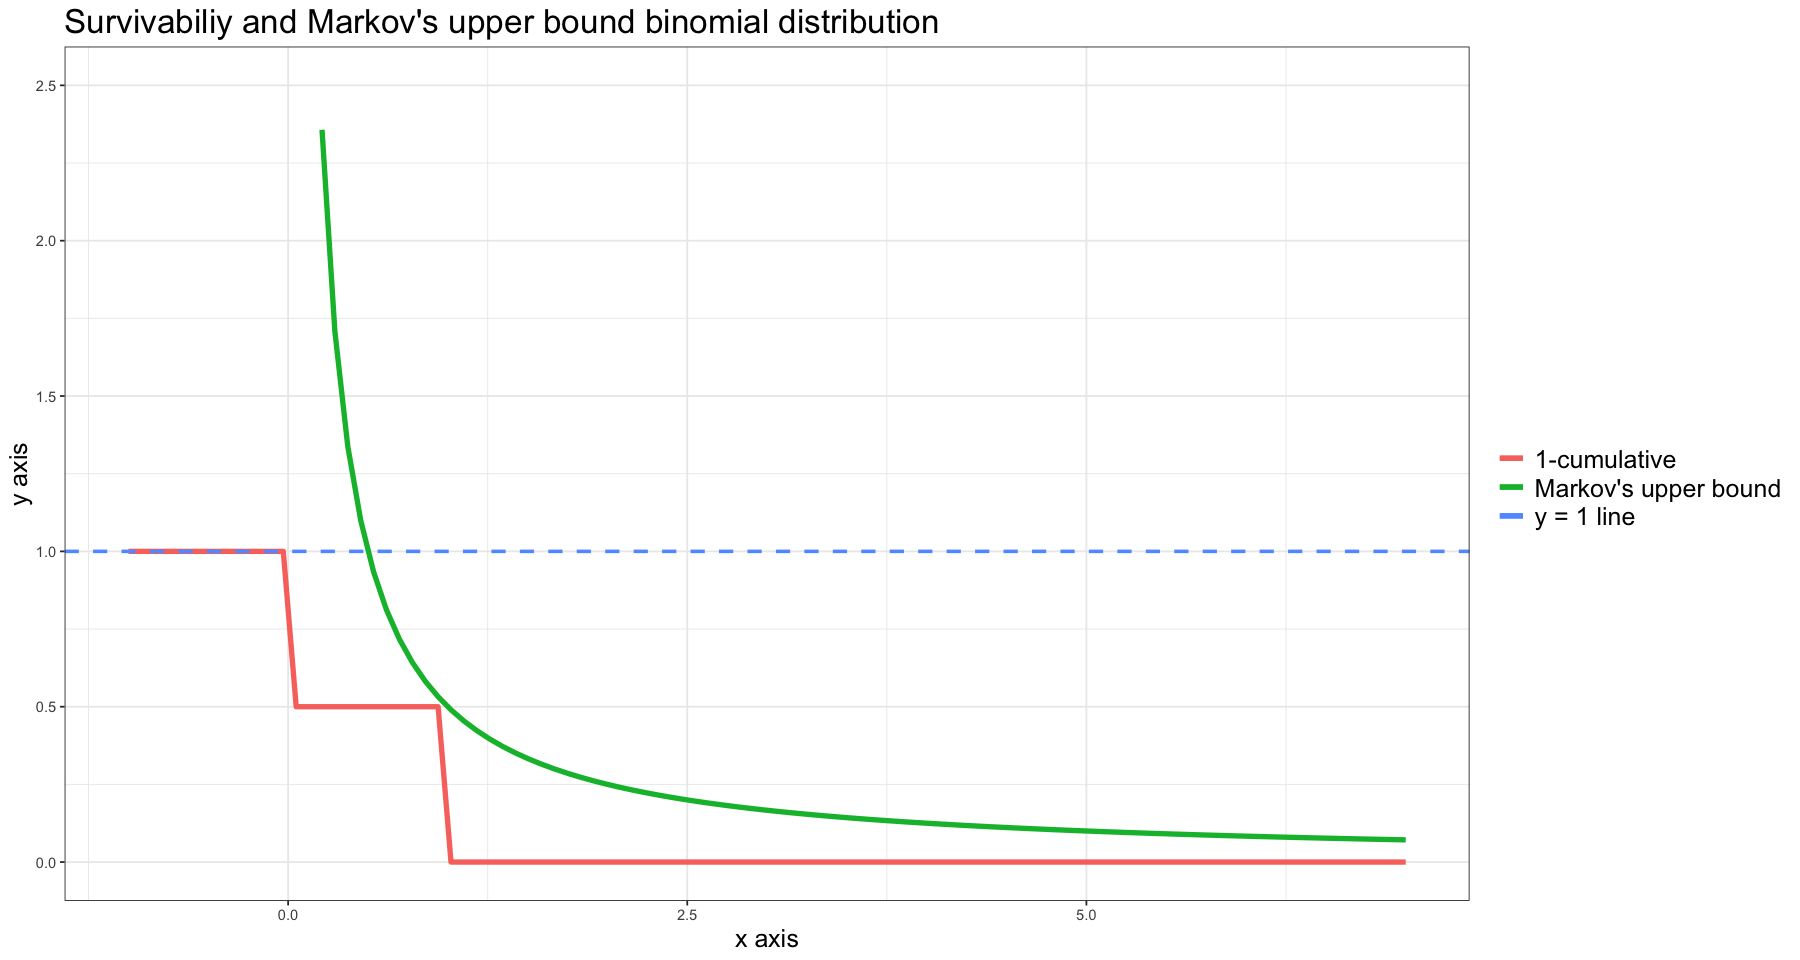

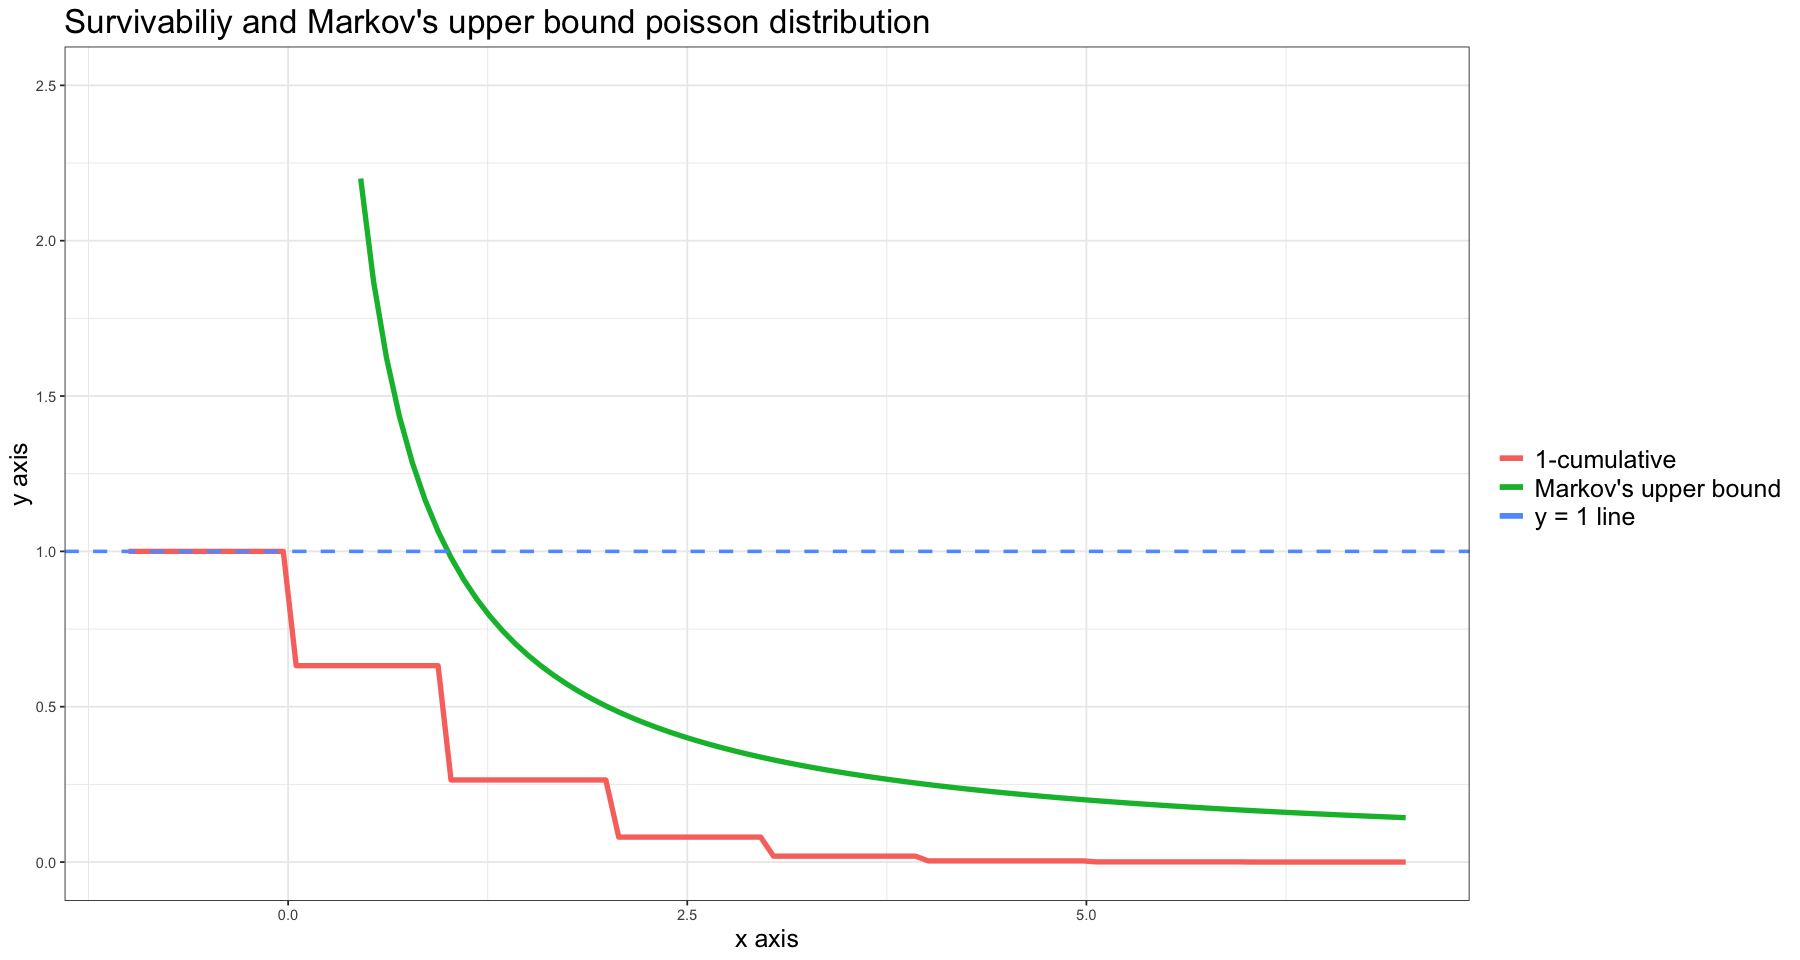

In [25]:
x_axis <- seq(0, 10, length=100)
y <- pexp(q=x_axis, rate = 1, lower.tail=FALSE)

markov_bound(x_axis=x_axis, y=y, exp_value = 1, distr_name='exponential')

x_axis <- seq(0, 7, length=100)
rate <- 1
min <- 3
max <- 5
y <- punif(q=x_axis, min, max, lower.tail=FALSE)

markov_bound(x_axis=x_axis, y=y, exp_value = (max+min)/2, distr_name='uniform')


x_axis <- seq(-1, 7, length=100)
trials <- 1
prob <- 1/2
y <- pbinom(q=x_axis, size = trials, prob = prob, lower.tail=FALSE)

markov_bound(x_axis=x_axis, y=y, exp_value = (trials*prob), distr_name='binomial')




x_axis <- seq(-1, 7, length=100)
lambda <- 1
y <- ppois(q=x_axis, lambda = lambda, lower.tail=FALSE)

markov_bound(x_axis=x_axis, y=y, exp_value = lambda, distr_name='poisson')



In [26]:
chebyshev_bound <- function(x_axis, cumul, mean, distr_name){
    plot <- ggplot() +
                geom_vline(aes(xintercept = mean, color = "x = mean"), linetype="dashed", size=1) +
                geom_line(aes(x=x_axis, y = cumul, color='1-cumulative') , lwd=1.5)+
                geom_line(aes(x=x_axis, y= y, color=' Chebyshev\'s bound'), lwd=1.5) +
                theme_bw() +
                labs(color='') +
                theme(legend.text=element_text(size=15)) +
                ggtitle(sprintf('Survivabiliy and Chebyshev\'s upper and lower bound %s distribution', distr_name)) +
                xlab('x axis') +
                ylab('y axis') +
                theme(plot.title = element_text(size=20)) +
                theme(axis.title = element_text(size=15)) +
            
                ylim(0,2)
    return(plot)
}           
            

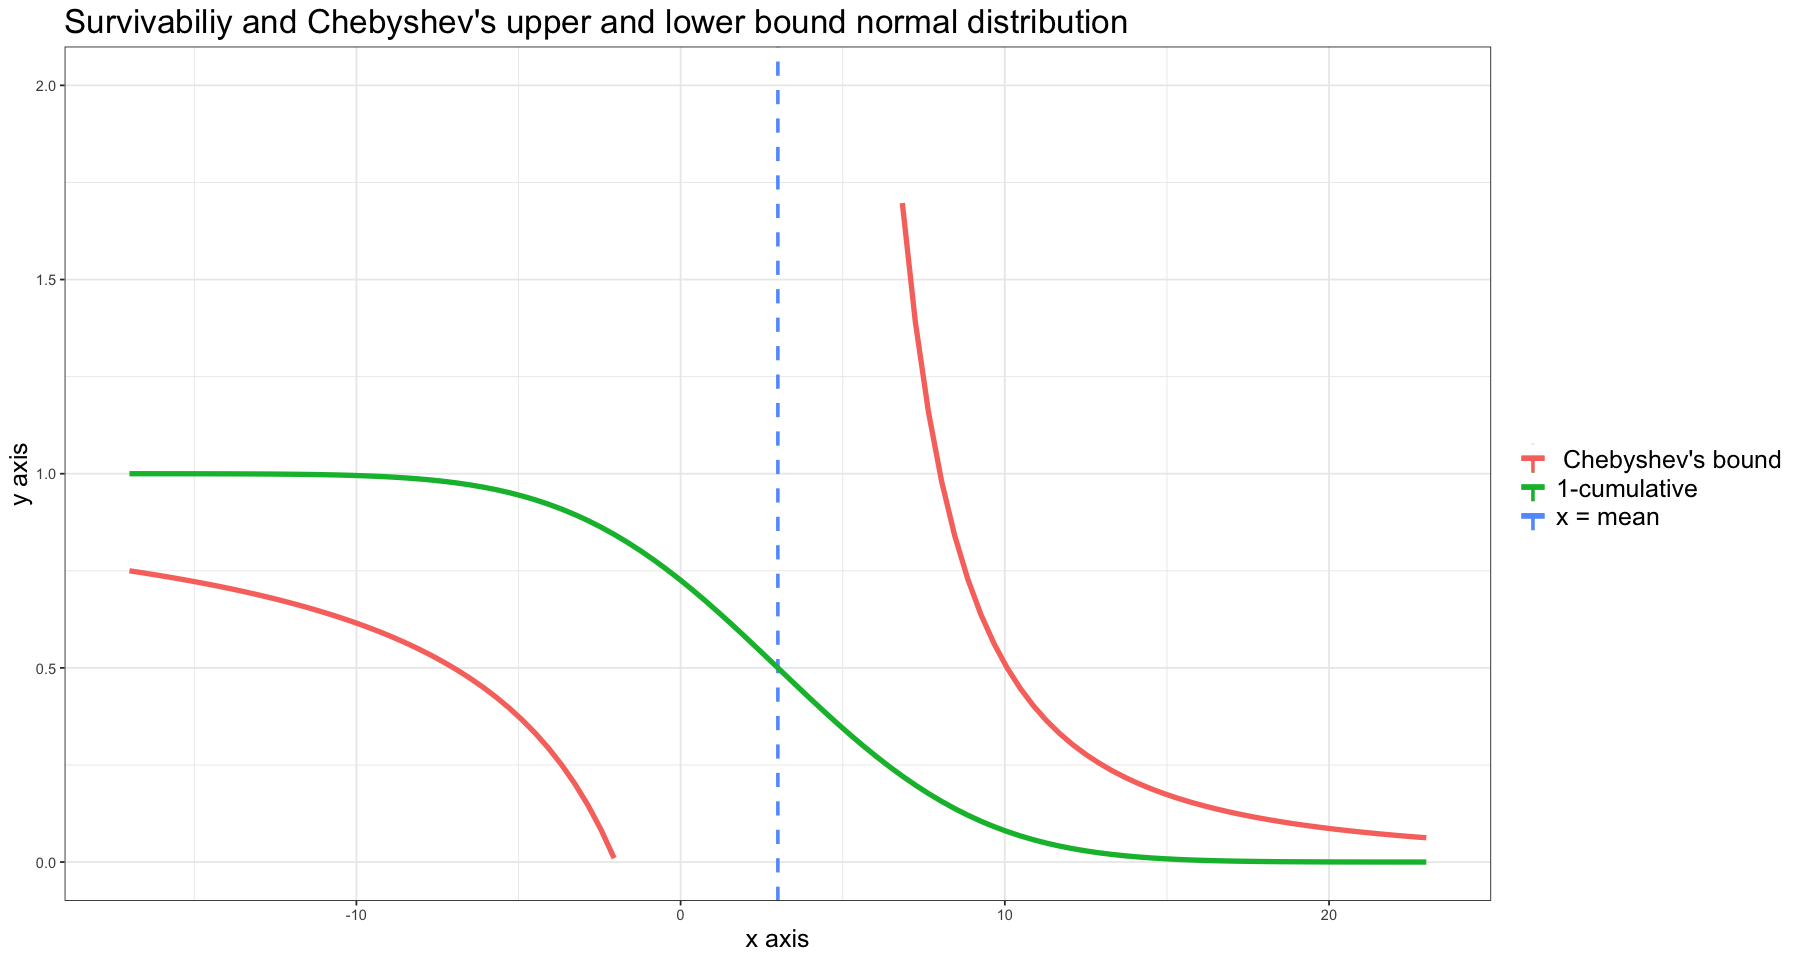

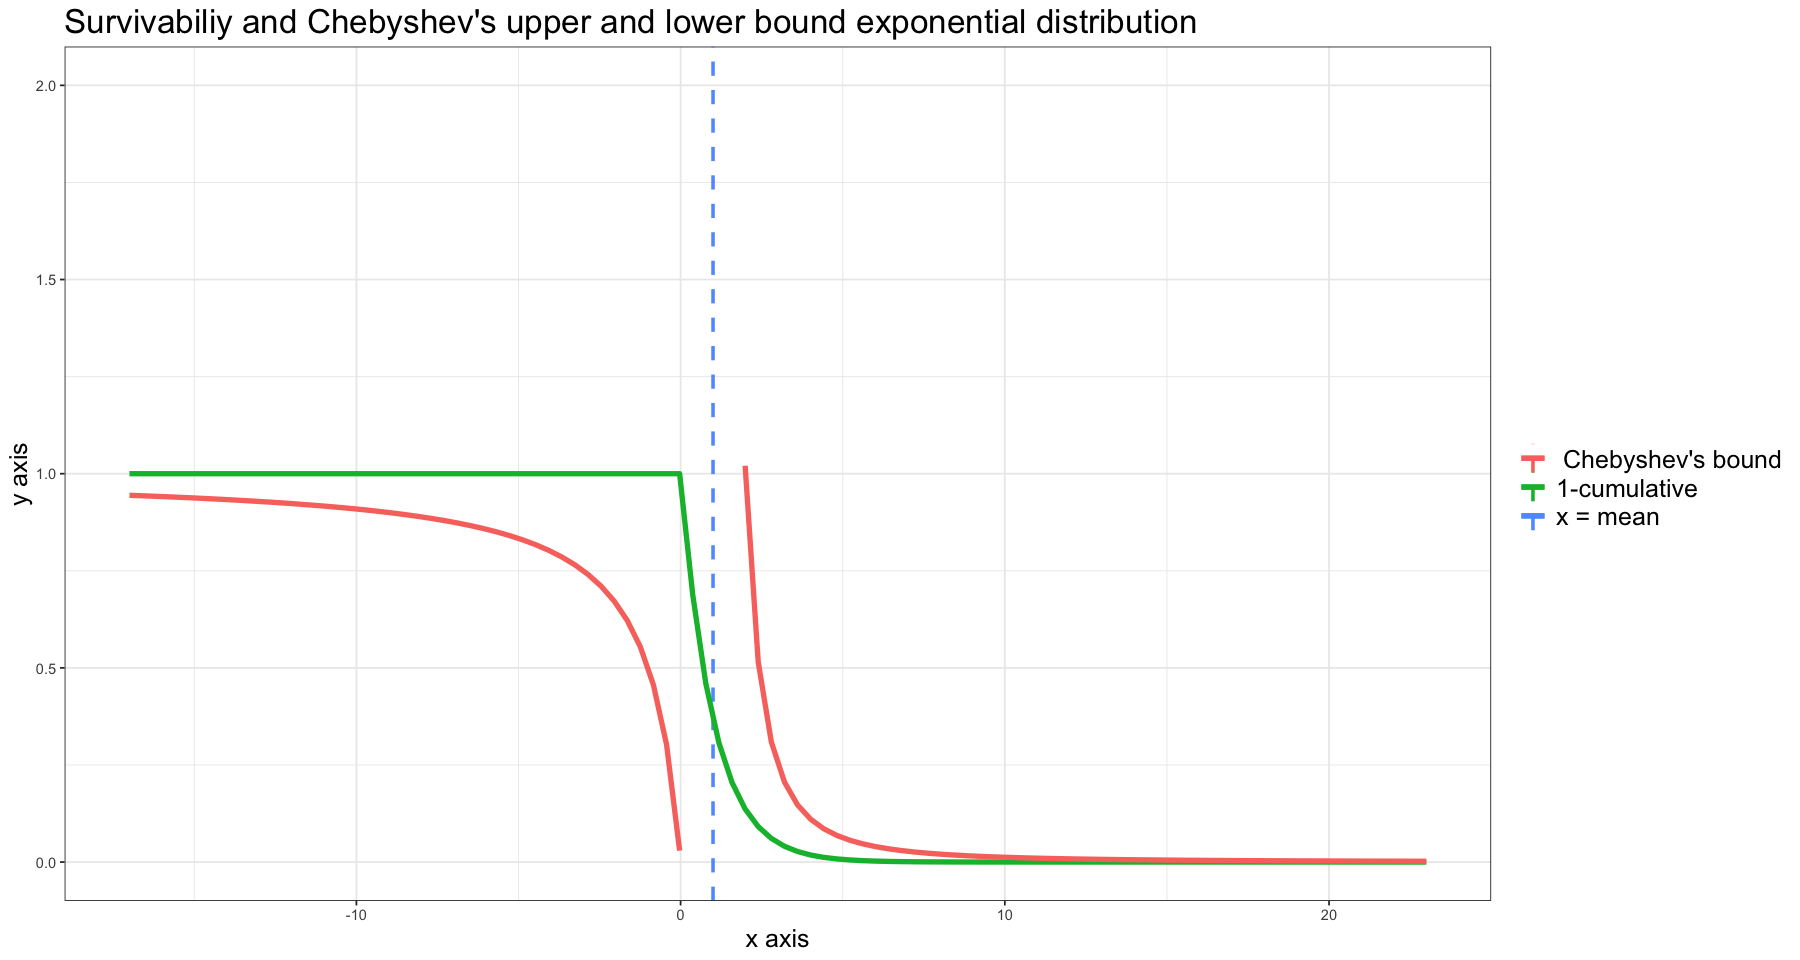

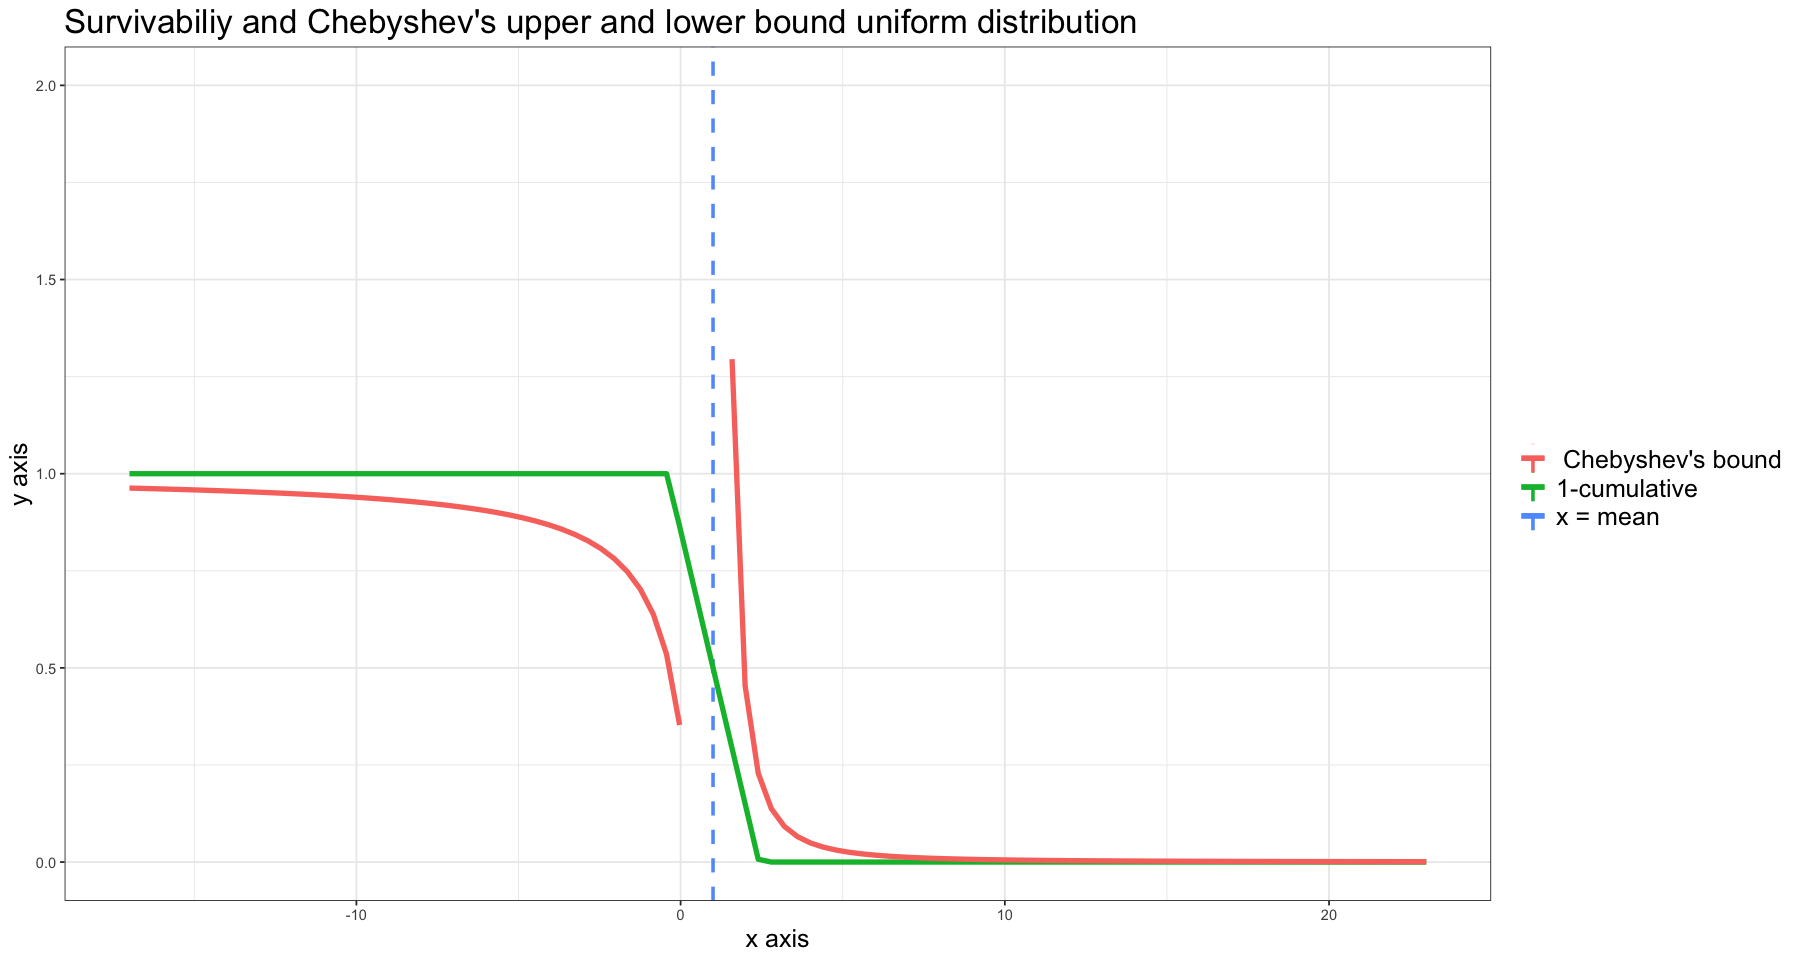

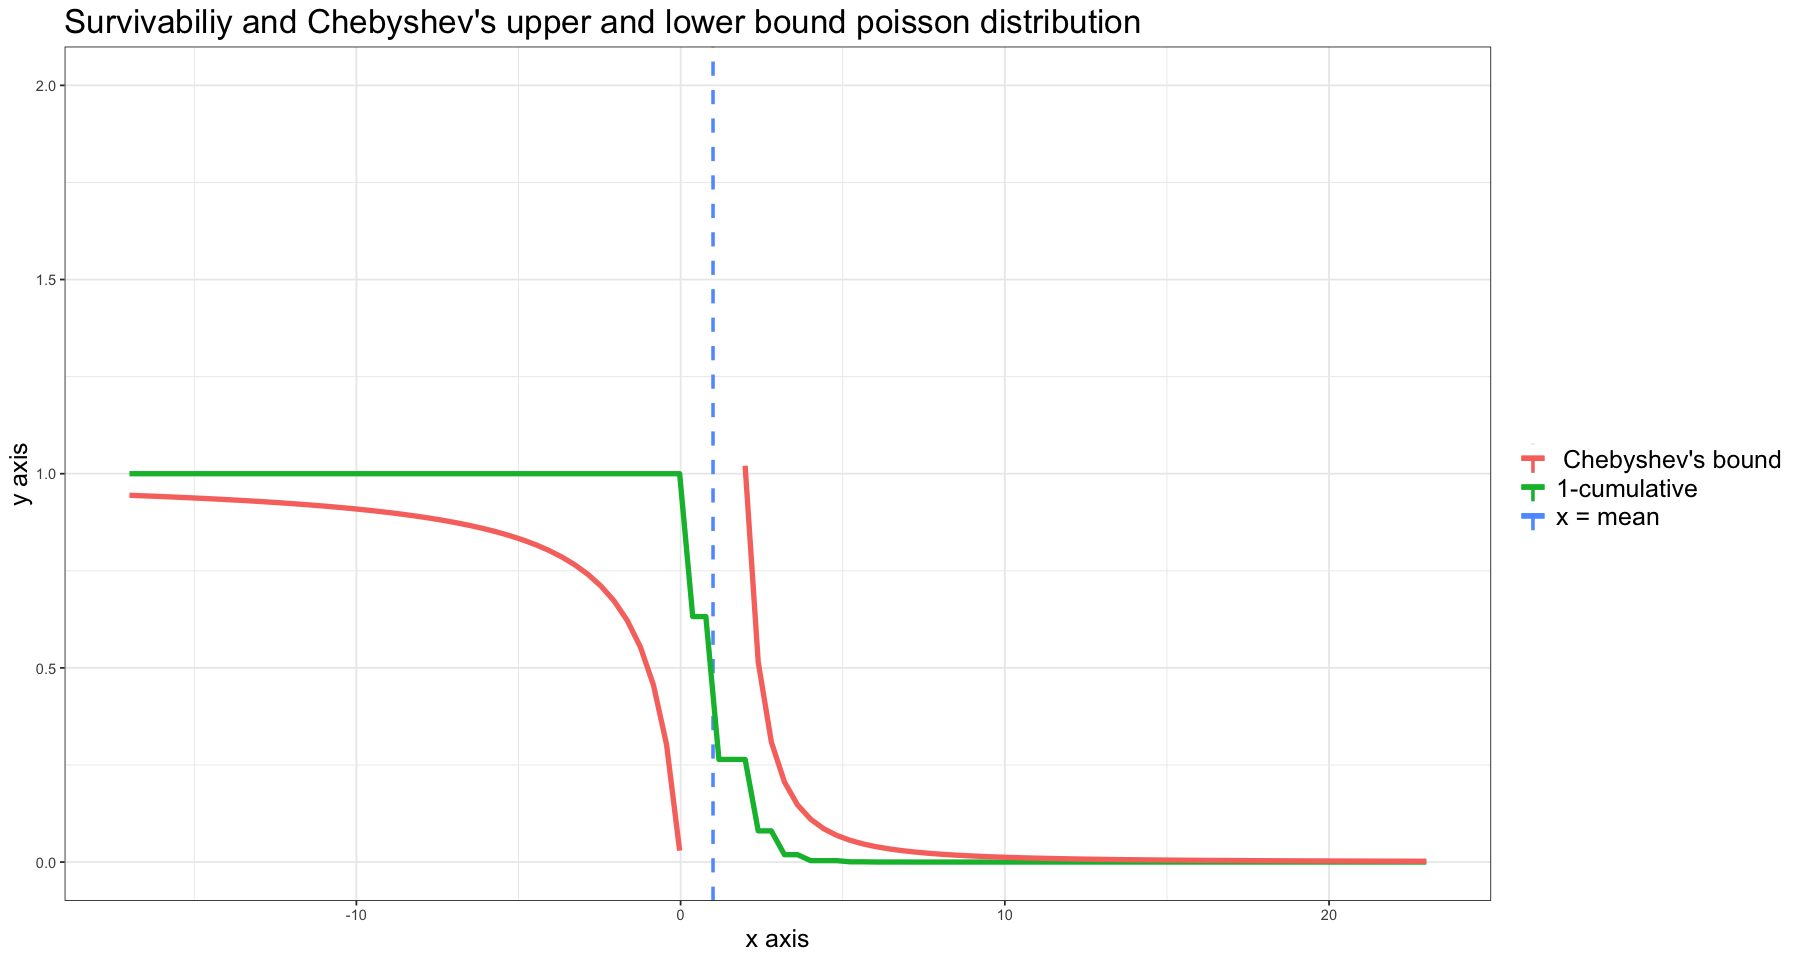

In [30]:
x_axis <- seq(3-20, 3+20, length=100)
mean <- 3
var <- 5
cumul <- pnorm(q=x_axis, mean=mean, sd=var, lower.tail = FALSE)
y <- ifelse(x_axis>mean, 1/((1/var)*(x_axis - mean))^2, 1-1/((-x_axis+mean)/var))

chebyshev_bound(x_axis=x_axis, cumul = cumul, mean=mean, distr_name='normal')

x_axis <- seq(3-20, 3+20, length=100)
rate <- 1
mean <- 1/rate
var <- 1/rate^2
cumul <- pexp(q=x_axis, rate=rate, lower.tail = FALSE)
y <- ifelse(x_axis>mean, 1/((1/var)*(x_axis - mean))^2, 1-1/((-x_axis+mean)/var))

chebyshev_bound(x_axis=x_axis, cumul = cumul, mean=mean, distr_name='exponential')


x_axis <- seq(3-20, 3+20, length=100)
min <- 1 - sqrt(2)
max <- 1 + sqrt(2)
mean <- (min + max)/2
var <- (1/12)*(max-min)^2
cumul <- punif(q=x_axis, min=min, max=max, lower.tail = FALSE)
y <- ifelse(x_axis > mean, 1/((1/var)*(x_axis - mean))^2, 1-1/((-x_axis+mean)/var))

chebyshev_bound(x_axis=x_axis, cumul = cumul, mean=mean, distr_name='uniform')


x_axis <- seq(3-20, 3+20, length=100)
lambda <- lambda
mean <- lambda
var <- lambda
cumul <- ppois(q=x_axis, lambda=lambda, lower.tail = FALSE)
y <- ifelse(x_axis > mean, 1/((1/var)*(x_axis - mean))^2, 1-1/((-x_axis+mean)/var))

chebyshev_bound(x_axis=x_axis, cumul = cumul, mean=mean, distr_name='poisson')

## Exercise 4

DoneProbabilities over time: 

0,1,2,3,4,5
0.1666667,1.666667e-01,0.1666666667,0.166666667,0.16666667,0.1666667
0.0000000,6.666667e-02,0.1333333333,0.200000000,0.26666667,0.3333333
0.0000000,1.818182e-02,0.0727272727,0.163636364,0.29090909,0.4545455
0.0000000,4.444444e-03,0.0355555556,0.120000000,0.28444444,0.5555556
0.0000000,1.021450e-03,0.0163432074,0.082737487,0.26149132,0.6384065
0.0000000,2.259887e-04,0.0072316384,0.054915254,0.23141243,0.7062147
0.0000000,4.874482e-05,0.0031196685,0.035534974,0.19965879,0.7616378
0.0000000,1.032791e-05,0.0013219726,0.022587142,0.16921250,0.8068681
0.0000000,2.159925e-06,0.0005529408,0.014171269,0.14155286,0.8437208
0.0000000,4.473342e-07,0.0002290351,0.008804880,0.11726598,0.8736997



Enjoy your most probable configuration and a little fun part that recalls it! 






5 
6

That masterful shooting helped the great Dorothea Wierer win bronze in Beijing!
    
    
    
    

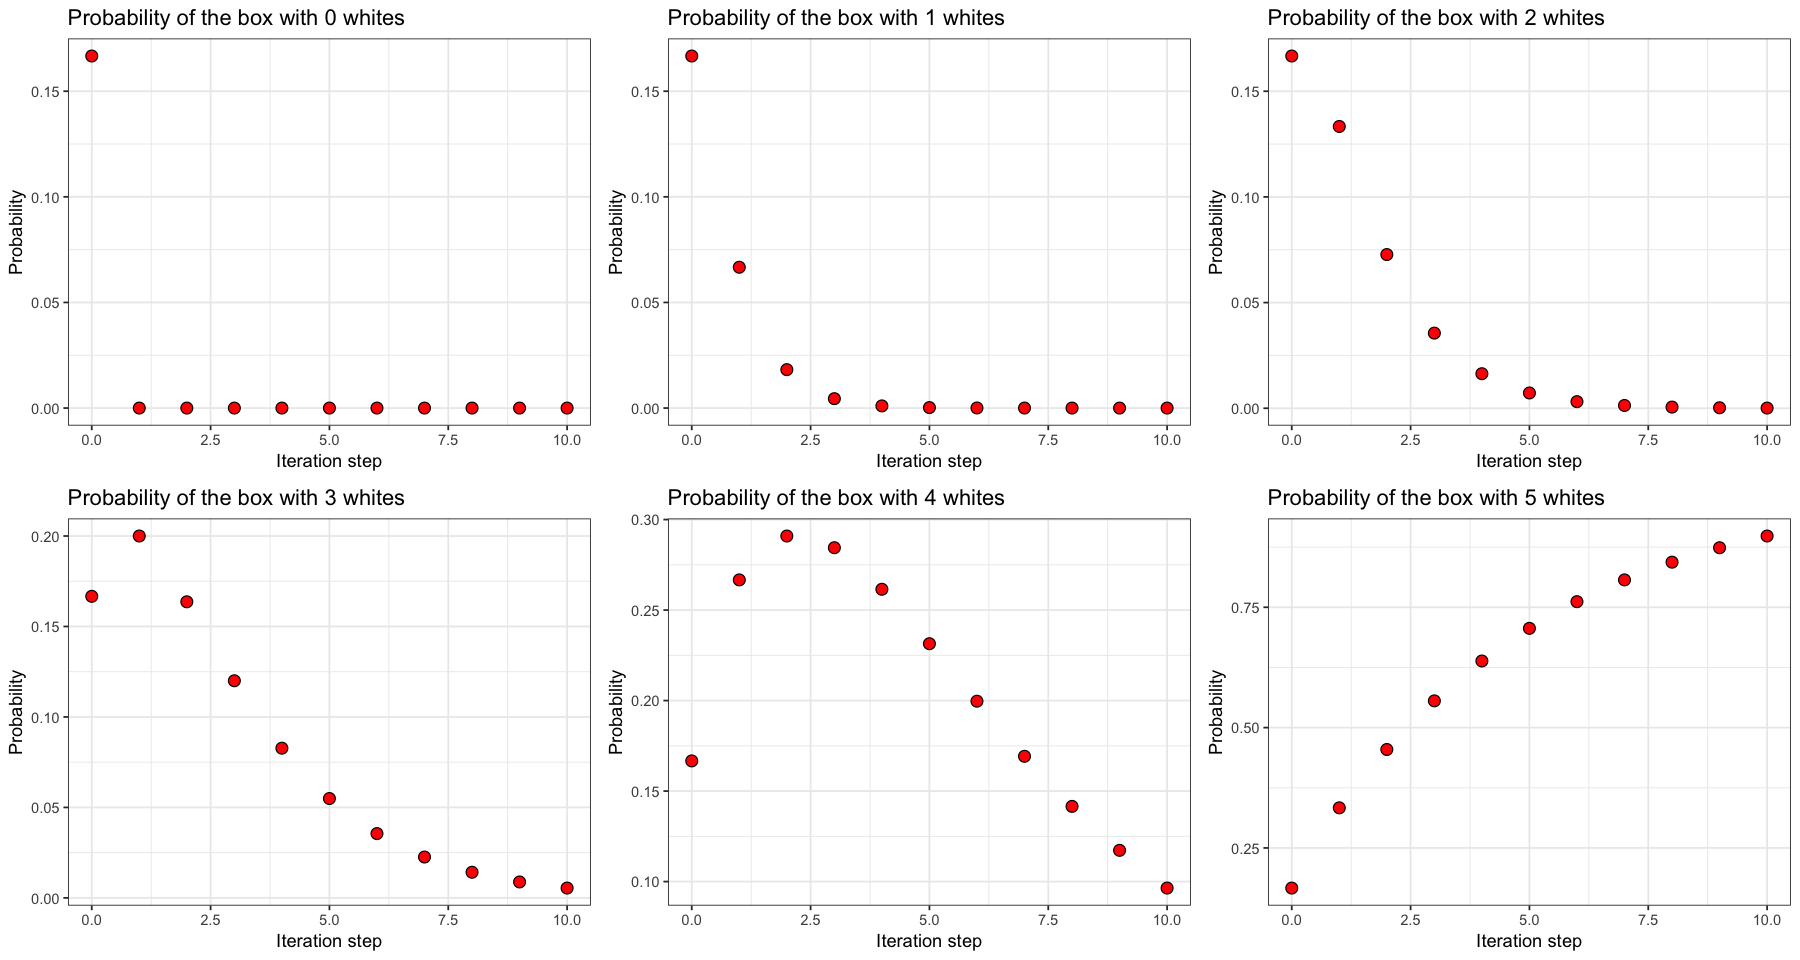

In [33]:
n_boxes <- 6
whites <- 0:(n_boxes-1)
probabilities <- data.frame(rep(1/n_boxes, n_boxes))
probabilities <- data.frame(t(probabilities))
colnames(probabilities) <- 0:(n_boxes-1)
rownames(probabilities) <- 1



plotting <- function(col, df=probabilities){
            plot <- ggplot() +
          geom_point(aes(x = x_axis, y = df[,col]), size=3, colour='black', pch=21, fill='red') +
          labs(title = sprintf('Probability of the box with %s whites', col-1), x='Iteration step', y= 'Probability') +
          theme_bw()
}




while (TRUE){
    color <- readline(prompt="Insert the color of the extracted stone [b/w]. \n If you're done, anything else: ")

    if (toupper(color) == 'W'){
        p_e <- whites/max(whites)

    }
    else if(toupper(color) == 'B'){
        p_e <- (max(whites)-whites)/max(whites)
    }

    else{
        cat('Done')
        break
    }

    tmp_prob <- (p_e * probabilities[nrow(probabilities), ])

    
    
    #normalization
    tmp_prob <- tmp_prob/(sum(tmp_prob))
    
    #cat('     ',tmp_prob,'    ')
    probabilities[nrow(probabilities)+1, 1:n_boxes] <- tmp_prob
    
    
}

x_axis <- 0:(nrow(probabilities)-1)
grid.arrange(plotting(1), plotting(2), plotting(3), plotting(4), plotting(5), plotting(6), nrow=2)

cat('Probabilities over time: ')
probabilities


cat('
Enjoy your most probable configuration and a little fun part that recalls it! \n



')

which.max(probabilities[nrow(probabilities),])
if (which.max(probabilities[nrow(probabilities),])==1){
    utils::browseURL('big_5_J_Boe.mov')
    utils::browseURL('H_0.png')

    cat('That was the final shooting in the mass start at the 2019 Oestersund\'s world championship,\n
    Dominik Windisch went on to win the gold! 
    
    
    
    
    ')
}


if (which.max(probabilities[nrow(probabilities),])==2){
    
    utils::browseURL('Latypov_olympics.mp4')
    utils::browseURL('H_1.png')

    cat('That was Ėduard Latypov blowing the relay at the Olympics for Russia!
    
    
    ')
}

if (which.max(probabilities[nrow(probabilities),])==3){
    
    utils::browseURL('Eckhoff.MP4')
    utils::browseURL('H_2.png')

    cat('That was Tiril Eckhoff missing four times handind Dorothea Wierer the overall globe!
    
    
    
    ')
}
if (which.max(probabilities[nrow(probabilities),])==4){
    
    utils::browseURL('Wierer_Oestersund.mov')
    utils::browseURL('H_3.png')


    cat('That was Dorothea Wierer on the last shooting of the 2019 Oestersund worls championship\'s 
    mass start.
    Don\'t worry, despite the misses she went on to win gold!
    
    
    
    ')
}
if (which.max(probabilities[nrow(probabilities),])==5){
    utils::browseURL('H_4.png')
    utils::browseURL('Tsvetskov_olympics.mov')

    cat('That was Maxime Tsvetskov loosing gold and even the podium in the individual last shooting\'s at the \n
    olympics
    
    
    ')

}
if (which.max(probabilities[nrow(probabilities),])==6){
    
    utils::browseURL('Wierer_olympics.mov')
    utils::browseURL('H_5.png')

    cat('That masterful shooting helped the great Dorothea Wierer win bronze in Beijing!
    
    
    
    ')
}




# Exercise 5

Probabilities over time: 

0,1,2,3,4,5,Extracted stone
0.1666667,0.1666667,0.16666667,0.1666666667,1.666667e-01,0.1666667,-
0.3333333,0.2666667,0.20000000,0.1333333333,6.666667e-02,0.0000000,Black
0.0000000,0.2000000,0.30000000,0.3000000000,2.000000e-01,0.0000000,White
0.0000000,0.3200000,0.36000000,0.2400000000,8.000000e-02,0.0000000,Black
0.0000000,0.1538462,0.34615385,0.3461538462,1.538462e-01,0.0000000,White
0.0000000,0.2461538,0.41538462,0.2769230769,6.153846e-02,0.0000000,Black
0.0000000,0.3459459,0.43783784,0.1945945946,2.162162e-02,0.0000000,Black
0.0000000,0.4452174,0.42260870,0.1252173913,6.956522e-03,0.0000000,Black
0.0000000,0.5386639,0.38348238,0.0757496055,2.104156e-03,0.0000000,Black
0.0000000,0.3494881,0.49761092,0.1474402730,5.460751e-03,0.0000000,White


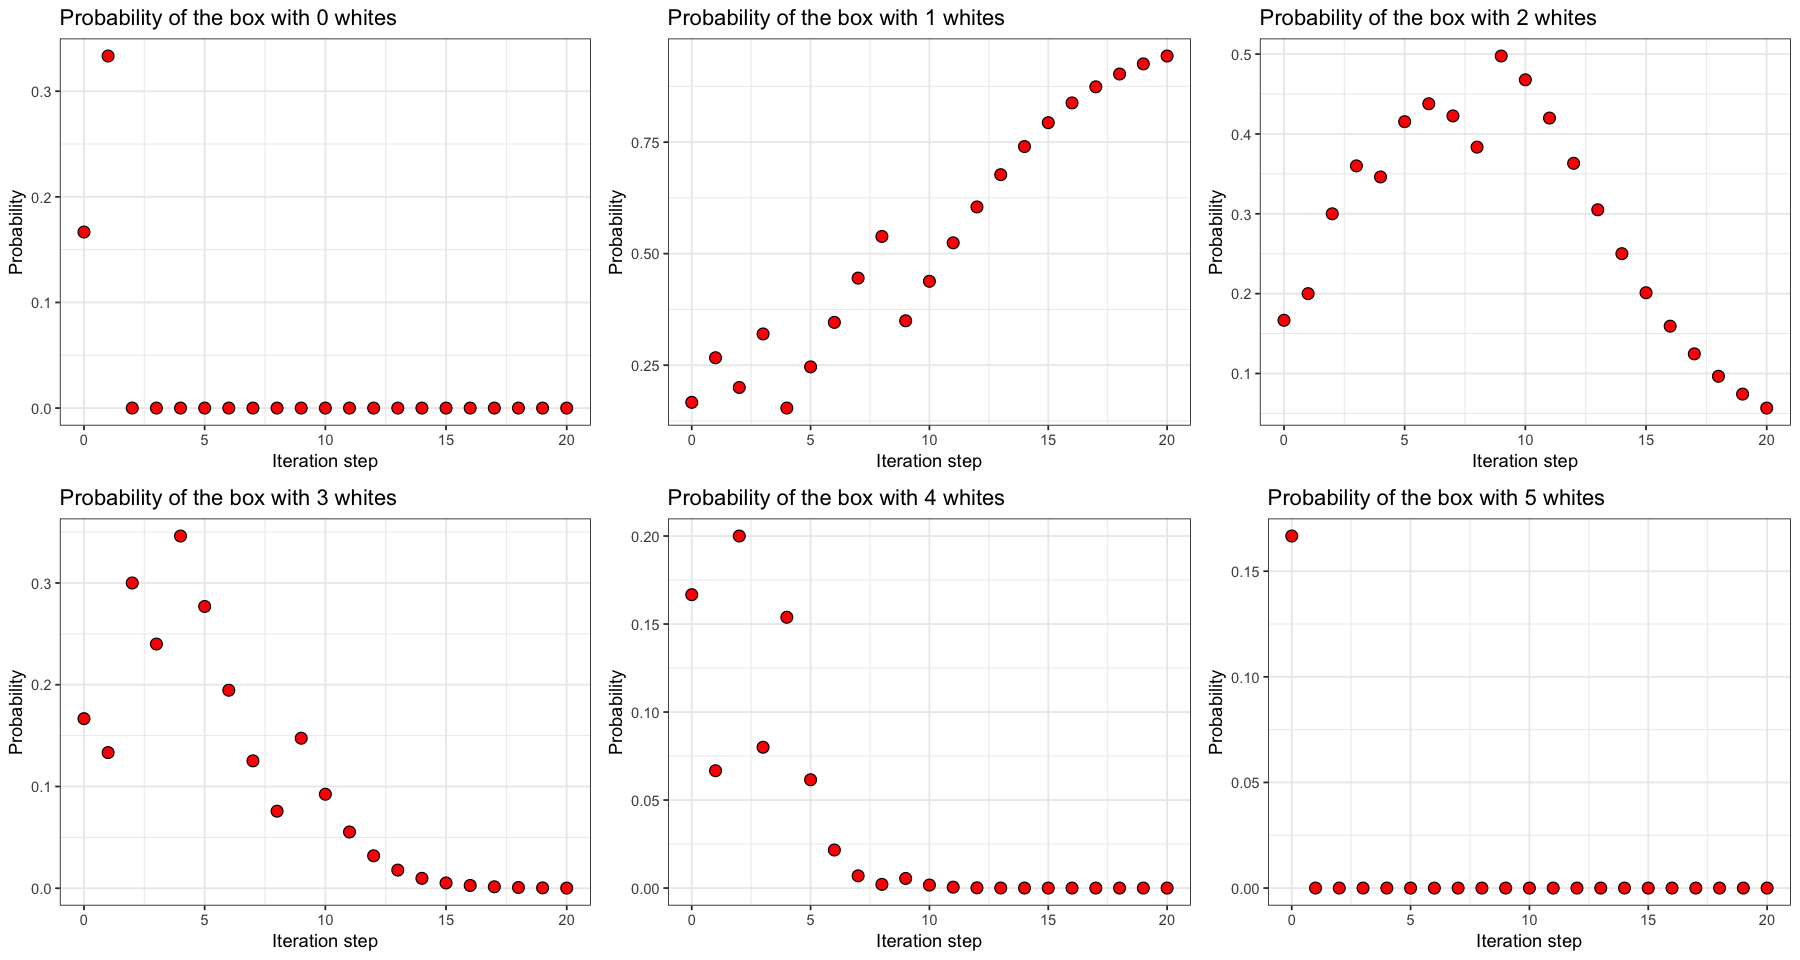

In [35]:

#We index the boxes by the amount of white stones inside them
boxes <- 0:5

tot_draw <- readline(prompt="How many draws should the program do? ")

tot_boxes <- length(boxes)
whites <- 0:(tot_boxes-1)
probabilities <- data.frame(rep(1/tot_boxes, tot_boxes))
probabilities <- data.frame(t(probabilities))

rownames(probabilities) <- 1


probabilities[1, ncol(probabilities)+1] = '-'
colnames(probabilities) <- c(boxes, 'Extracted stone')
#dataframe with only numerical entries


chosen_box <- sample(boxes, size = 1)

#We define the process of drawing a stone as a random sampling in the set [0,5]
#if the draw return a value < that chosen_box then it will be treated as a withe stone
for (draw in seq(1, tot_draw, by = 1)){
    draw_stone <- sample(boxes, size = 1)


    
    if (draw_stone < chosen_box){
        p_e <- whites/max(whites)
        color <- 'White'
    }
    else if(draw_stone >= chosen_box){
        p_e <- (max(whites)-whites)/max(whites)
        color <- 'Black'
    }


    tmp_prob <- (p_e * probabilities[nrow(probabilities), 1:tot_boxes])

    
    
    #normalization
    tmp_prob <- tmp_prob/(sum(tmp_prob))

   
    
    probabilities[nrow(probabilities) + 1, ] = c(tmp_prob, color)
    
    
}  
cat('Probabilities over time: ')
probabilities
x_axis <- 0:(nrow(probabilities)-1)

df_plot <- probabilities[,ncol(probabilities)-1]

grid.arrange(plotting(1), plotting(2), plotting(3), plotting(4), plotting(5), plotting(6), nrow=2)

